In [157]:
from pyrosm import OSM, get_data
import pandas as pd
pd.options.mode.chained_assignment = None

### London

In [14]:
fp = "greater-london-latest.osm.pbf"
osm = OSM(fp)

In [15]:
my_filter={"shop":['convenience', 'clothes', 'supermarket', 'books', 'gift', 'shoes', 'toys', 'greengrocer', 'grocery'], "amenity": ["bank", "school", "restaurant", "cafe", "library",  "bar", "cinema", "park", "arts_center", "theatre"],
          "leisure": ["park"]}
pois = osm.get_pois(custom_filter=my_filter)

/Users/alexandergirardet/miniforge3/lib/python3.9/site-packages/pyrosm/pyrosm.py:576: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  gdf = get_poi_data(


In [16]:
to_keep = ['restaurant', 'cafe', 'convenience', 'clothes', 'supermarket', 'bank', 'school', 'books', 'library', 'bar', 'gift', 'shoes', 'toys', 'greengrocer', 'grocery', 'cinema', 'park', 'arts_center', 'theatre']

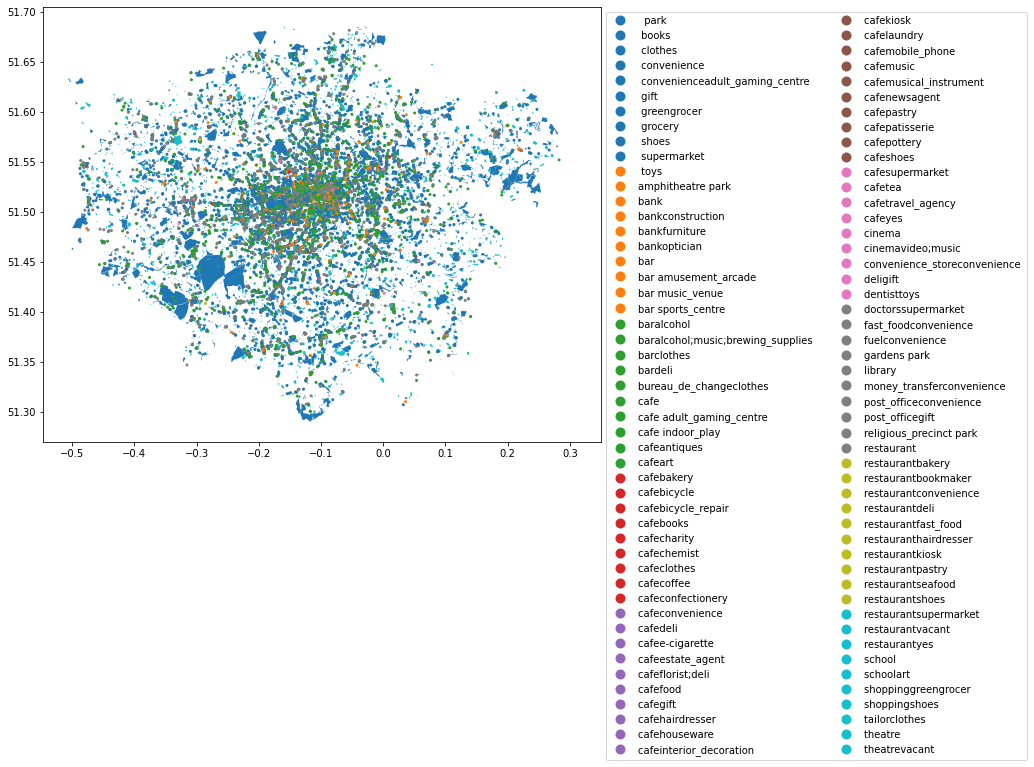

In [17]:
# Merge poi type information into a single column
pois["shop"] = pois["shop"].fillna(' ')
pois["amenity"] = pois["amenity"].fillna(' ')
pois["leisure"] = pois["leisure"].fillna(' ')
pois["poi_type"] = pois["amenity"] + pois["shop"] + pois["leisure"]

# Plot
ax = pois.plot(column="poi_type", legend=True, markersize=4, figsize=(14,8), legend_kwds=dict(loc='upper left', ncol=2, bbox_to_anchor=(1, 1)))

### Clean data

In [19]:
pois['poi_type_clean'] = pois['poi_type'].apply(lambda x: x.strip())

points_to_keep = pois[pois['poi_type_clean'].isin(to_keep)]

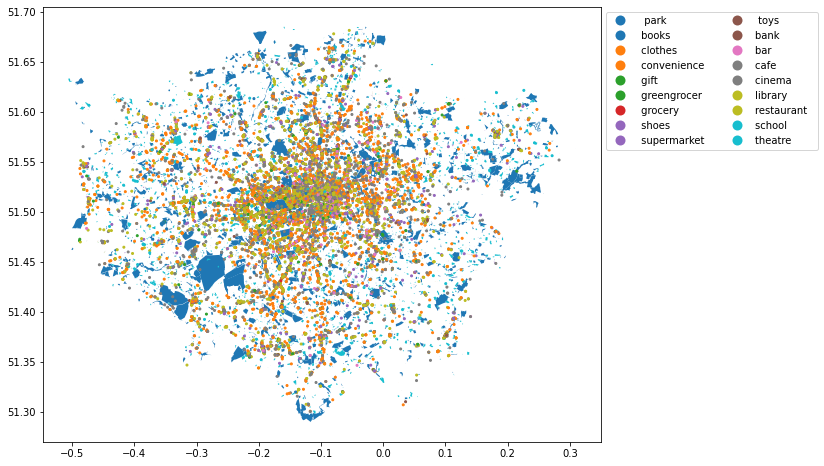

In [20]:
ax = points_to_keep.plot(column="poi_type", legend=True, markersize=4, figsize=(14,8), legend_kwds=dict(loc='upper left', ncol=2, bbox_to_anchor=(1, 1)))

In [ ]:
points_to_keep['geometry'] = points_to_keep.geometry.centroid

/var/folders/8p/yf_sl9nj34xbrvxr076rlnl40000gn/T/ipykernel_39238/3789952023.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points_to_keep['geometry'] = points_to_keep.geometry.centroid
/Users/alexandergirardet/miniforge3/lib/python3.9/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


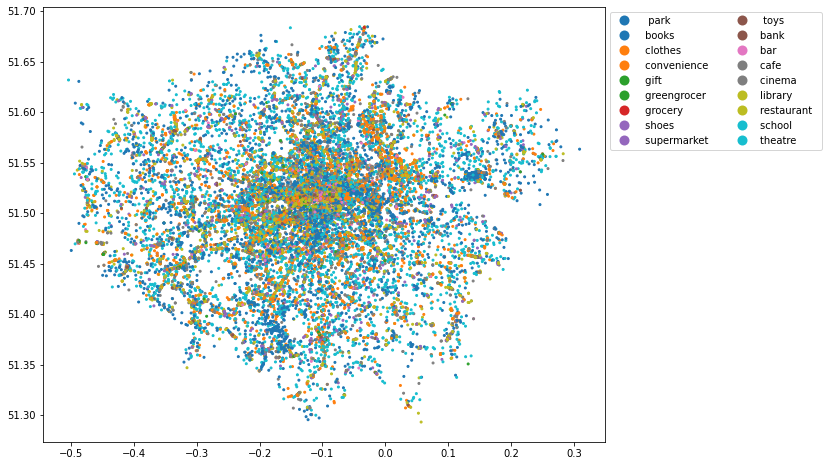

In [22]:
ax = points_to_keep.plot(column="poi_type", legend=True, markersize=4, figsize=(14,8), legend_kwds=dict(loc='upper left', ncol=2, bbox_to_anchor=(1, 1)))

In [23]:
df = points_to_keep[['geometry', 'poi_type_clean']]

### GeoPandas

In [24]:
import pandas as pd

In [25]:
housing_data = pd.read_csv("../../training_data.csv", lineterminator='\n', index_col=0, usecols=['property_id', 'postcode', 'yearly_price', 'lon', 'lat'])

In [26]:
property_id = 124950755

In [27]:
prop = housing_data.loc[property_id]

In [28]:
import geopandas
import matplotlib.pyplot as plt

In [30]:
from scipy.spatial import KDTree
from sklearn.neighbors import BallTree

In [39]:
df['lon'] = df['geometry'].x
df['lat'] = df['geometry'].y

/Users/alexandergirardet/miniforge3/lib/python3.9/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/alexandergirardet/miniforge3/lib/python3.9/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


### Group amenities

In [43]:
amenities = {
    "grocery": ['convenience', 'supermarket', 'greengrocer', 'grocery'],
    "restaurants": ['restaurant', 'bar', 'clothes'],
    "shopping": ['toys', 'shoes', 'gift'],
    "coffee": ['cafe'],
    "banks": ['bank'],
    "parks": ['park'],
    "schools": ['school'],
    "books": ['books', 'library'],
    "entertainment": ['cinema', 'theatre'],
    }

amenity_weights = {
"grocery": [3],
"restaurants": [.75, .45, .25, .25, .225, .225, .225, .225, .2, .2],
"shopping": [.5, .45, .4, .35, .3],
"coffee": [1.25, .75],
"banks": [1],
"parks": [1],
"schools": [1],
"books": [1],
"entertainment": [1],
}

def group_amenities(amenity):
    for key, values in amenities.items():
        if amenity in values:
            return key

df['amenities'] = df['poi_type_clean'].apply(group_amenities)

In [44]:
df.amenities.value_counts()

restaurants      11610
grocery           5670
coffee            5378
parks             3465
schools           3269
shopping          1035
banks              949
books              685
entertainment      375
Name: amenities, dtype: int64

In [45]:
from math import radians

In [46]:
df['lon_rad'] = df['lon'].apply(lambda x: radians(x))
df['lat_rad'] = df['lat'].apply(lambda x: radians(x))

/Users/alexandergirardet/miniforge3/lib/python3.9/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/alexandergirardet/miniforge3/lib/python3.9/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [47]:
df

,geometry,poi_type_clean,lon,lat,amenities,lon_rad,lat_rad
0,POINT (-0.19350 51.60203),restaurant,-0.193503,51.602032,restaurants,-0.003377,0.900625
1,POINT (-0.11561 51.52108),library,-0.115614,51.521076,books,-0.002018,0.899212
2,POINT (-0.02070 51.44463),library,-0.020698,51.444626,books,-0.000361,0.897878
3,POINT (-0.33402 51.41101),cafe,-0.334017,51.411007,coffee,-0.005830,0.897291
4,POINT (-0.11896 51.51735),bar,-0.118957,51.517345,restaurants,-0.002076,0.899147
...,...,...,...,...,...,...,...
32628,POINT (-0.11185 51.46752),park,-0.111845,51.467516,parks,-0.001952,0.898278
32629,POINT (0.08598 51.56859),school,0.085978,51.568587,schools,0.001501,0.900042
32630,POINT (-0.08873 51.52366),park,-0.088732,51.523663,parks,-0.001549,0.899258
32631,POINT (0.00836 51.46664),restaurant,0.008357,51.466644,restaurants,0.000146,0.898262


In [ ]:
from math import radians
earth_radius = 6371000 # meters in earth
test_radius = 100000 # meters

prop_lat = -0.181797
prop_lon = 51.54454
# test_points_rad = np.array([[radians(prop_lat), radians(x[1])] for x in test_points ])

tree = BallTree(test_points_rad, metric = 'haversine')
ind,results = tree.query_radius(test_points_rad, r=test_radius/earth_radius, 
return_distance  = True)
print(ind)
print(results * earth_radius/1000)

In [171]:
housing_data

,postcode,geolocation,yearly_price
property_id,,,
115053551,S18,"(-1.47954,53.37863)",8700.0
62461979,B1,"(-1.88886,52.45346)",6000.0
85332021,DN1,"(-1.11568,53.52741)",5040.0
85740999,BD1,"(-1.79497,53.64915)",7800.0
85760106,BA16,"(-2.89067,50.9783)",12000.0
...,...,...,...
124701320,RH1,"(-0.18836,51.42104)",23940.0
124956311,RH13,"(-0.16017,50.83254)",22200.0
124678049,BN8,"(-0.007056,51.124378)",15600.0


In [359]:
6371000/100000

63.71

In [166]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Get walk score function

In [170]:
%%time
prop_lon = radians(-0.181797)
prop_lat = radians(51.54454)

def get_walk_score(property_longitude, property_latitude):
    radian_longitude = radians(property_longitude)
    radian_latitude = radians(property_latitude)

    earth_radius = 6371000 # meters in earth

    new_df = pd.DataFrame()

    for key, values in amenity_weights.items():

        current_df = df[df['amenities'] == key]
        current_df.reset_index(drop=True, inplace=True)
        current_ball = BallTree(current_df[['lon_rad', 'lat_rad']].values, metric='haversine')
        k = len(values)

        distances, indices = current_ball.query([[radian_longitude, radian_latitude]], k=k, return_distance  = True)


        distance_in_meters = [x * earth_radius for x in distances]

        if k > 1:
            result_df = current_df[current_df.index.isin(indices[0])]

        else: 
            result_df = current_df.iloc[indices[0]]


        ### Add series

        dist_series = pd.Series(distance_in_meters[0], index=indices[0], name='distance')
        weight_series = pd.Series(values, index=indices[0], name='weights')
        result_df['distance'] = dist_series
        result_df['weights'] = weight_series
        new_df = new_df.append(result_df)

        ### Calculate score

    new_df['distance_decayed'] = new_df['distance'].apply(lambda x: float(distance_decay(x)))
    new_df['weighted_distance'] = new_df['weights'] * new_df['distance_decayed'] * 6.67
    scores = new_df[['weighted_distance', 'amenities']].groupby('amenities').sum()
    walk_score = scores.sum().values[0]
    return walk_score

CPU times: user 12 µs, sys: 2 µs, total: 14 µs
Wall time: 19.3 µs


## Get Boundaries

In [190]:
housing_data = pd.read_csv("../../training_data.csv", lineterminator='\n', index_col=0, usecols=['property_id', 'postcode', 'yearly_price', 'longitude', 'latitude'])

In [192]:
housing_gdf = gdf = geopandas.GeoDataFrame(
    housing_data, geometry=geopandas.points_from_xy(housing_data.longitude, housing_data.latitude))


In [172]:
boundaries = osm.get_boundaries()

In [214]:
greater_london = boundaries.iloc[36].geometry

In [219]:
housing_data['in_london'] = housing_data['geometry'].apply(lambda x: greater_london.contains(x))

london_data = housing_data[housing_data['in_london'] == True]

### Get scores

In [220]:
london_data

,latitude,longitude,postcode,yearly_price,geometry,in_london
property_id,,,,,,
123259514,51.541140,-0.284757,AL2,25289.285714,POINT (-0.28476 51.54114),True
124924928,51.478290,-0.084910,BR1,20075.000000,POINT (-0.08491 51.47829),True
124299944,51.538800,-0.106740,BR1,21639.285714,POINT (-0.10674 51.53880),True
124905221,51.512100,0.001353,BR1,22800.000000,POINT (0.00135 51.51210),True
124913414,51.499465,-0.019209,BR1,49170.714286,POINT (-0.01921 51.49947),True
...,...,...,...,...,...,...
124961135,51.523987,-0.070463,IG1,28678.571429,POINT (-0.07046 51.52399),True
65091881,51.369186,-0.096737,RH3,17700.000000,POINT (-0.09674 51.36919),True
124701320,51.421040,-0.188360,RH1,23940.000000,POINT (-0.18836 51.42104),True


In [232]:
london_data.at[index, 'walk_score'] = 

,latitude,longitude,postcode,yearly_price,geometry,in_london
property_id,,,,,,
123259514,51.541140,-0.284757,AL2,25289.285714,POINT (-0.28476 51.54114),True
124924928,51.478290,-0.084910,BR1,20075.000000,POINT (-0.08491 51.47829),True
124299944,51.538800,-0.106740,BR1,21639.285714,POINT (-0.10674 51.53880),True
124905221,51.512100,0.001353,BR1,22800.000000,POINT (0.00135 51.51210),True
124913414,51.499465,-0.019209,BR1,49170.714286,POINT (-0.01921 51.49947),True
...,...,...,...,...,...,...
124961135,51.523987,-0.070463,IG1,28678.571429,POINT (-0.07046 51.52399),True
65091881,51.369186,-0.096737,RH3,17700.000000,POINT (-0.09674 51.36919),True
124701320,51.421040,-0.188360,RH1,23940.000000,POINT (-0.18836 51.42104),True


In [239]:
%%time
for row in london_data.itertuples():
    index = row.Index
    latitude = london_data.loc[index]['latitude']
    longitude = london_data.loc[index]['longitude']
    score = get_walk_score(longitude, latitude)
    london_data.at[index, 'walk_score'] = score

CPU times: user 14min 38s, sys: 26.7 s, total: 15min 4s
Wall time: 15min 22s


In [238]:
848.1700000000001 / 60

14.136166666666668

In [243]:
london_data

,latitude,longitude,postcode,yearly_price,geometry,in_london,walk_score
property_id,,,,,,,
123259514,51.541140,-0.284757,AL2,25289.285714,POINT (-0.28476 51.54114),True,41.293080
124924928,51.478290,-0.084910,BR1,20075.000000,POINT (-0.08491 51.47829),True,71.329126
124299944,51.538800,-0.106740,BR1,21639.285714,POINT (-0.10674 51.53880),True,95.607712
124905221,51.512100,0.001353,BR1,22800.000000,POINT (0.00135 51.51210),True,53.469662
124913414,51.499465,-0.019209,BR1,49170.714286,POINT (-0.01921 51.49947),True,94.810413
...,...,...,...,...,...,...,...
124961135,51.523987,-0.070463,IG1,28678.571429,POINT (-0.07046 51.52399),True,99.402263
65091881,51.369186,-0.096737,RH3,17700.000000,POINT (-0.09674 51.36919),True,91.946097
124701320,51.421040,-0.188360,RH1,23940.000000,POINT (-0.18836 51.42104),True,57.611298


### OLS

In [254]:
import statsmodels.api as sm

y = london_data['yearly_price']
X = london_data[['walk_score', 'latitude', 'longitude']]

X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()

In [255]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           yearly_price   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     297.3
Date:                Tue, 02 Aug 2022   Prob (F-statistic):          1.58e-184
Time:                        17:12:45   Log-Likelihood:            -1.0384e+05
No. Observations:                9530   AIC:                         2.077e+05
Df Residuals:                    9526   BIC:                         2.077e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -3.92e+05   1.01e+05     -3.897      0.000   -5.89e+05   -1.95e+05
walk_score   166.8277      5.777     28.878      0.000     155.504     178.152
latitude    7902.6641   1952.658      4.047      0.000    4075.039    1.17e+04
longitude  -6489.2398    999.321     -6.494      0.000   -8448.122   -4530.357
==============================================================================
Omnibus:                     2254.052   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4917.887
Skew:                           1.365   Prob(JB):                         0.00
Kurtosis:                       5.221   Cond. No.                     6.45e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.45e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Figures

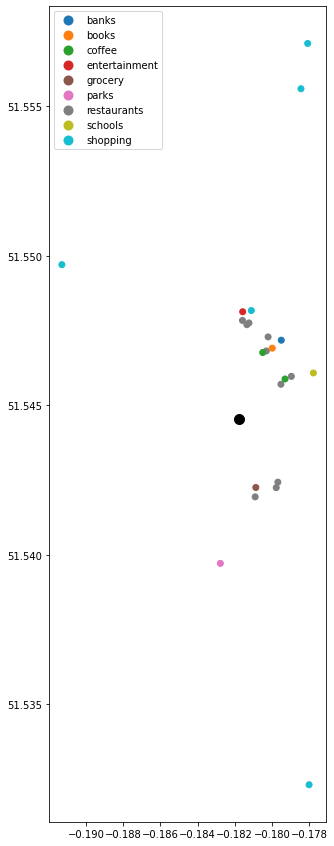

In [306]:
fig, ax = plt.subplots(1, 1, figsize=(20,15))

gdf.plot(column='amenities', ax=ax, legend=True)
# plt.xlim([-.5, .5])
# plt.ylim([45, 55])
plt.scatter(prop_lat, prop_lon, color='black', s=100)

In [234]:
ax.plot()

[]

In [231]:
housing_df

NameError: name 'housing_df' is not defined

In [222]:
new_df

,geometry,poi_type_clean,geometry_float,lon,lat,amenities
4222,POINT (0.13178 51.35060),greengrocer,"(0.131777017050899, 51.350601936993144)",0.131777,51.350602,grocery
1396,POINT (0.14046 51.39541),bar,"(0.14045830070972443, 51.39541244506836)",0.140458,51.395412,restaurants
2743,POINT (0.10478 51.35614),restaurant,"(0.10478460043668747, 51.356143951416016)",0.104785,51.356144,restaurants
5062,POINT (0.11735 51.37395),restaurant,"(0.11734800040721893, 51.37394714355469)",0.117348,51.373947,restaurants
7591,POINT (0.04047 51.30775),restaurant,"(0.04047192494027306, 51.30774574358535)",0.040472,51.307746,restaurants
7592,POINT (0.03784 51.30862),restaurant,"(0.03783596484174671, 51.30862339289775)",0.037836,51.308623,restaurants
7593,POINT (0.04000 51.30785),restaurant,"(0.039995846045684395, 51.307850614048014)",0.039996,51.307851,restaurants
7971,POINT (0.05697 51.29309),restaurant,"(0.056969553786809055, 51.29309088960634)",0.056970,51.293091,restaurants
8638,POINT (0.05266 51.30184),restaurant,"(0.052661140566289656, 51.30184018255252)",0.052661,51.301840,restaurants
8861,POINT (0.16661 51.43476),restaurant,"(0.16661177767687183, 51.43476494962143)",0.166612,51.434765,restaurants


In [203]:
current_df.iloc[350]

geometry          POINT (0.1904476840252895 51.45514488475146)
poi_type_clean                                         theatre
geometry_float        (0.19044768402528953, 51.45514488475146)
lon                                                   0.190448
lat                                                  51.455145
amenities                                        entertainment
Name: 29932, dtype: object

In [196]:
amenity_weights = {
    "grocery": [3],
    "restaurants": [.75, .45, .25, .25, .225, .225, .225, .225, .2, .2],
    "shopping": [.5, .45, .4, .35, .3],
    "coffee": [1.25, .75],
    "banks": [1],
    "parks": [1],
    "schools": [1],
    "books": [1],
    "entertainment": [1],
    }

### Distance decay function

In [1]:
import math

In [2]:
def distance_decay(distance):
    M = float(1)
    dist = distance/1000
    score = math.e**((-5.0*(dist/4))**5.0)
    return score

In [522]:
distance = 1000

dist = distance/1000

math.e**(-5.0*(dist/1))**5.0

0.0

In [475]:
math.e**((-5.0*(dist/1))**5.0)

1.0253027762563748e-42

In [476]:
math.log(5)

1.6094379124341003

In [376]:
for key, value in zip(dist, indices):
    distance = float(key[0])
    
    score = distance_decay(distance)
    print(score)

0.0


In [119]:
decays = [distance_decay(x) for x in range(0, 2000)]
ranges = [x for x in range(0, 2000)]

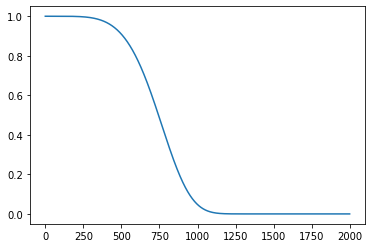

In [120]:
plt.plot(ranges, decays)

In [121]:
distance_decay(1250)

9.022303864536423e-05